# Project Demo of ( ReImplement of "BusterNet: Detecting Copy-Move Image Forgery with Source/Target Localization" using PyTorch library)

## Using this Demo you can test any image you want to see if it forged or not?

Group 4: Raghad Besheit Almatrafi, Shouq Abid Alsalmi, and Sumayya Abdullah Alfadhli

The input to our system is an image and the out put is the image with three masks;blue for pristine, green for source and red for target copy as you see in the following figure.

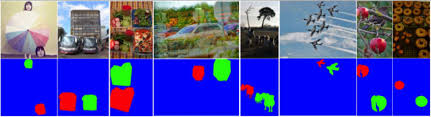

In [32]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import important library

In [33]:
import os
import numpy as np
import cv2
from torchvision import transforms

import matplotlib.pyplot as plt
import torch 
import torch.nn as nn

from net import BusterNet

Define visualization function that show to us the original image with three prediction which are: Similarity mask,Manipulation mask, and  finally the Output mask.

In [34]:

def viz(imgs_np, simi_out_np, mani_out_np, mask_out_np, index):
    fig = plt.figure(figsize=(20, 80))

    img = imgs_np[index]
    img = imgs_np[index] * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]

    ax = fig.add_subplot(1, 4, 1)
    plt.imshow(img)
    plt.title('Original Image')

    simi_pred = (simi_out_np[index] * 2).astype(np.uint8)
    ax = fig.add_subplot(1, 4, 2)
    plt.imshow(simi_pred[:,:, 0])
    plt.title('Similarity mask')

    mani_pred = (mani_out_np[index] * 2).astype(np.uint8)
    ax = fig.add_subplot(1, 4, 3)
    plt.imshow(mani_pred[:,:, 0])
    plt.title('Manipulation mask')

    mask_pred = (mask_out_np[index] * 2).astype(np.uint8) * 255
    ax = fig.add_subplot(1, 4, 4)
    plt.imshow(mask_pred)
    plt.title('Output mask')

    plt.show()

Set the tranforms property for the input image

In [35]:
input_size = 256

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225]),
])

Here you can put the path of your image

In [40]:
img = cv2.imread('DSC_0535tamp176.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = transform(img)
imgs = img.unsqueeze(0)

Here we will print the shape of the entered image

In [24]:
imgs.shape

torch.Size([1, 3, 256, 256])

Here we can test the entered image to see if it forged or no, and determine the forged part of the image

In [41]:
model = BusterNet(input_size)

model.load_state_dict(torch.load('trained_model/buster_epoch_13.pth'))

model.eval()
with torch.no_grad():
    preds = model(imgs)
    
mask_out, mani_output, simi_output = preds

mask_out_np = mask_out.permute(0, 2, 3, 1).numpy()
mani_out_np = mani_output.permute(0, 2, 3, 1).numpy()
simi_out_np = simi_output.permute(0, 2, 3, 1).numpy()


Finally we will show to you the entered image with its prediction

Note: The following output is not accura

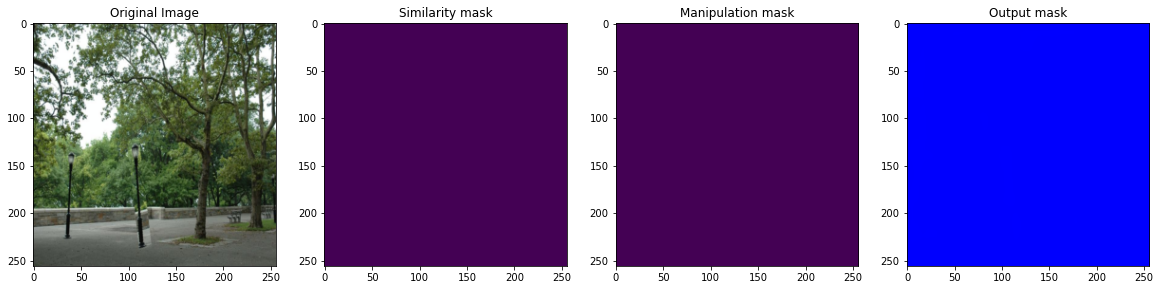

In [26]:
index = 0
imgs_np = imgs.permute(0, 2, 3, 1).numpy()

viz(imgs_np, simi_out_np, mani_out_np, mask_out_np, index)